# VISUALIZATION

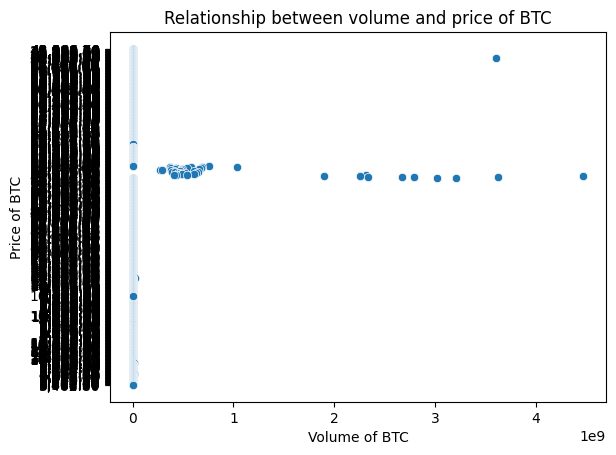

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bitcoin = pd.read_csv('../data/cleaned_bitcoin.csv', index_col = 0)

g = sns.scatterplot(x='bitcoin_vol.',
                y='bitcoin_price',
                data=bitcoin)
g.set_title('Relationship between volume and price of BTC')
g.set(xlabel='Volume of BTC',
    ylabel='Price of BTC')
plt.show()